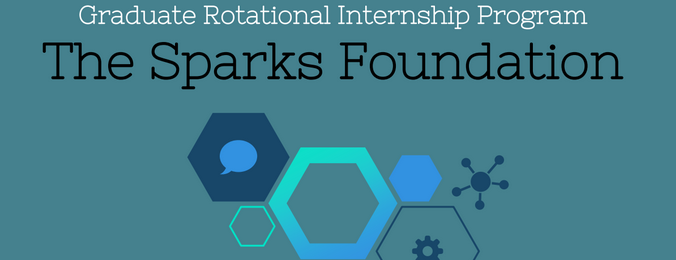

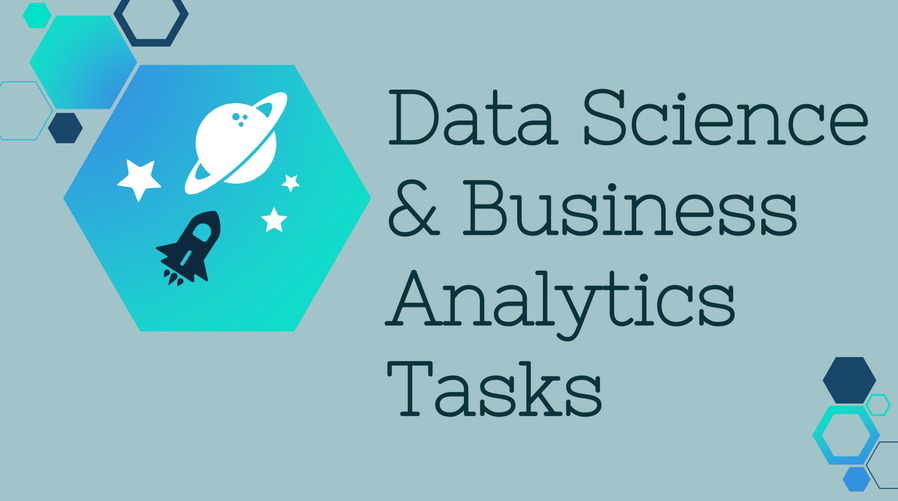

## <font color = 'Green'><h2>Author: Megha Varshney</h2></font>

<font color = 'Red'><h1>TASK1: Prediction using Supervised ML</h1></font>

####  Problem Statement

###  Predict the percentage of an student based on the no. of study hours.
### This is a `simple linear regression task` as it involves just 2 variables.
### What will be predicted score if a student studies for 9.25 hrs/ day?

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
# Read the given CSV file, and view some sample records

score = pd.read_csv("Student_scores.csv")
score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's inspect the various aspects of our dataframe

In [4]:
score.shape

(25, 2)

In [5]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


---
## Step 2: Visualising the Data

Let's now visualise our data using matplotlib and see how well both the dependent and independent variables are related to each other.

---

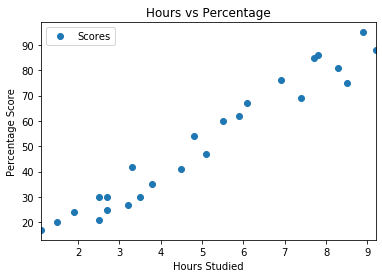

In [7]:
# Plotting the distribution of scores

score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<font color = 'Blue'><h4>INFERENCE:</h4></font> 
**From the graph above, we can clearly see that there is a positive linear relationship between the number of hours studied and percentage of score.**

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours-studied$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### 3.1 Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [8]:
X = score['Hours']
y = score['Scores']

### 3.2 Train-Test Split

You now need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. we will keep 70% of the data in our train dataset and the rest 30% in our test dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [11]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

### 3.3 Building a Linear Model

We first need to import the `statsmodel.api` library using which we'll perform the linear regression.

In [12]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the `add_constant` attribute of `statsmodels`. And once we've added the constant to our `X_train` dataset, we can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below:

In [13]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [14]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        00:00:11   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

<font color = 'Blue'><h4>Looking at some key statistics from the summary</h4></font>  

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared

##### 1. The coefficient for Hours is 9.8717, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.957
Meaning that 95.7% of the variance in `Score` is explained by `Hours`

This is a good R-squared value.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our `linear regression equation` becomes:

### Plotting the regression line
line = const + lr.coef*X 

<font color = 'Red'><h3>Sales = 1.4951 + 9.8717*Hours</h3></font>  


##### Visualizing the fit on the train set

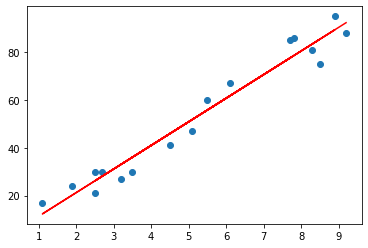

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference


#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [16]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

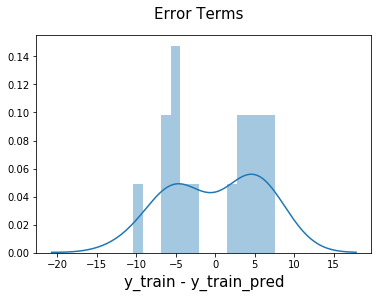

In [17]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

## Step 5: Predictions on the Test Set

Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [18]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [19]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [20]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

## Step 6: Evaluating the model

In [21]:
# importing r2 library from sklearn

from sklearn.metrics import r2_score

In [22]:
# Checking the R-squared on the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

<font color = 'Blue'><h3>Inference:</h3></font> 
<font color = 'Orange'><h4>R2 of test set is 0.930, which a decent value.</h4></font> 

##### Visualizing the fit on the test set

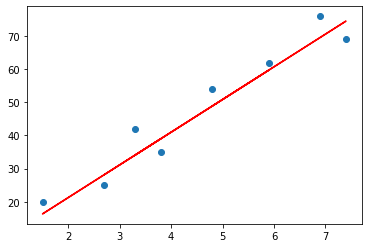

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.8717* X_test, 'r')
plt.show()

## Question: What will be predicted score if a student studies for 9.25 hrs/ day?


In [24]:
hours = 9.25
score= 1.4951 + 9.8717*hours
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score))

No of Hours = 9.25
Predicted Score = 92.808325


### Answer:  If a student studies 9.25 hrs/day he is most likely to score 92.80 %.